In [1]:
# project: p5
# submitter: aluo7
# partner: none
# hours: 5

In [2]:
from shapely.geometry import Polygon, box, Point
from graphviz import Digraph
import pandas as pd, geopandas as gpd, zipfile, edgar_utils, re

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
#Q1
with zipfile.ZipFile("server_log.zip") as zf:
    df = pd.read_csv(zf.open("rows.csv"))

total = 0
for x in df["size"]:
    total += x
    
int(total)

24801002666

In [5]:
#Q2
ips = {}
for x in df["ip"]:
    if x in ips:
        ips[x] += 1
    else:
        ips[x] = 1
        
dict(sorted(ips.items(), key = lambda x : -x[1])[:10])

{'54.152.17.ccg': 12562,
 '183.195.251.hah': 6524,
 '52.45.218.ihf': 5562,
 '68.180.231.abf': 5493,
 '204.212.175.bch': 4708,
 '103.238.106.gif': 4428,
 '208.77.215.jeh': 3903,
 '208.77.214.jeh': 3806,
 '217.174.255.dgd': 3551,
 '82.13.163.caf': 3527}

In [6]:
#Q3
c = 0
for x in df["code"]:
    if x >= 400:
        c += 1
        
c / len(df["code"])

0.03466852724527611

In [7]:
#Q4
cik = df["cik"]
acc = df["accession"]
ext = df["extention"]

files = {}
for x in range(len(cik)):
    f = str(int(cik[x])) + "/" + acc[x] + "/" + ext[x]
    
    if f in files:
        files[f] += 1
    else:
        files[f] = 1
        
list(dict(sorted(files.items(), key = lambda x: -x[1])).keys())[0]

'1627631/0001627631-15-000004/.txt'

In [8]:
#Q5
count = 0
for x in df["crawler"]:
    if x != 0:
        count += 1

count

971

In [9]:
#Q6
d = {}
for x in df["ip"]:
    reg = edgar_utils.lookup_region(x)
    if reg in d:
        d[reg] += 1
    else:
        d[reg] = 1

list(dict(sorted(d.items(), key = lambda x: -x[1])).keys())[0]

'United States of America'

In [10]:
#Q7   
no_dupes = df["ip"].drop_duplicates()

unique_ips = {}
for x in no_dupes:
    reg = edgar_utils.lookup_region(x)
    if reg in unique_ips:
        unique_ips[reg] += 1
    else:
        unique_ips[reg] = 1

over_1000 = {}
for j in ips:
    if ips[j] > 1000:
        reg = edgar_utils.lookup_region(j)
        if reg in over_1000:
            over_1000[reg] += 1
        else:
            over_1000[reg] = 1
            
ans = {}
for k in d.keys():
    if k in over_1000:
        ans[k] = over_1000[k] / unique_ips[k]
    else:
        ans[k] = 0
    
ans

{'United States of America': 0.019862490450725745,
 'China': 0.006864988558352402,
 'Hong Kong': 0,
 'Ireland': 0.3125,
 'Canada': 0.017857142857142856,
 'United Kingdom of Great Britain and Northern Ireland': 0.06666666666666667,
 'Czechia': 0,
 'Germany': 0,
 'Bulgaria': 0.3333333333333333,
 'France': 0.0036900369003690036,
 'India': 0.058823529411764705,
 'Korea (Republic of)': 0.2,
 'Australia': 0.07692307692307693,
 'Spain': 0,
 'Netherlands': 0,
 'Sweden': 0,
 'Sudan': 0,
 'Estonia': 0,
 'Russian Federation': 0,
 'Tanzania, United Republic of': 0,
 'Yemen': 0,
 'Algeria': 0,
 'Ukraine': 0,
 'Slovakia': 0,
 'Viet Nam': 0,
 'Denmark': 0,
 'Singapore': 0,
 'Switzerland': 0,
 'Thailand': 0,
 'South Africa': 0,
 'Italy': 0,
 'Poland': 0,
 'Taiwan (Province of China)': 0,
 'Brazil': 0,
 'Morocco': 0,
 'Malaysia': 0,
 'Hungary': 0,
 'Japan': 0,
 'Luxembourg': 0,
 'Romania': 0,
 'Liberia': 0,
 'Israel': 0,
 'Bangladesh': 0,
 'Austria': 0,
 'Indonesia': 0,
 'Saudi Arabia': 0,
 'Armenia': 

In [11]:
#Q8
with zipfile.ZipFile("docs.zip") as zf:
    with zf.open("850693/0000850693-07-000159/-index.htm") as f:
        html = f.read()
        
html = html.decode("utf-8")
f = edgar_utils.Filing(html)
f.dates

['2007-07-25', '2007-07-25', '2007-07-23']

In [12]:
#Q9
states = {}
with zipfile.ZipFile("docs.zip") as zf:
    for x in zf.namelist():
        with zf.open(x) as f:
            html = f.read()
            
        html = html.decode("utf-8")
        f = edgar_utils.Filing(html)
        
        if f.state() in states:
            states[f.state()] += 1
        else:
            states[f.state()] = 1
        
states.pop(None)
states

{'OX': 6,
 'NJ': 23,
 'MS': 1,
 'MA': 30,
 'CA': 91,
 'CO': 25,
 'NY': 83,
 'TX': 64,
 'FL': 21,
 'AL': 1,
 'IN': 4,
 'CT': 14,
 'UT': 5,
 'MD': 13,
 'KS': 5,
 'VA': 15,
 'OH': 10,
 'SD': 1,
 'DE': 10,
 'IL': 25,
 'GA': 8,
 'NC': 9,
 'PA': 25,
 'TN': 4,
 'MN': 15,
 'NM': 1,
 'KY': 2,
 'OK': 7,
 'AR': 1,
 'NV': 6,
 'VT': 1,
 'MO': 4,
 'MI': 11,
 'NE': 2,
 'IA': 6,
 'AZ': 5,
 'WI': 9,
 'LA': 2,
 'ID': 1,
 'OR': 2,
 'WV': 2,
 'WA': 3,
 'DC': 1,
 'ME': 1}

In [13]:
#Q10
sic = {}
with zipfile.ZipFile("docs.zip") as zf:
    for x in zf.namelist():
        with zf.open(x) as f:
            html = f.read()
            
        html = html.decode("utf-8")
        f = edgar_utils.Filing(html)
        
        if f.sic in sic:
            sic[f.sic] += 1
        else:
            sic[f.sic] = 1
        
sic.pop(None)
sic

{2834: 40,
 6022: 20,
 1311: 20,
 6189: 17,
 6211: 17,
 8731: 2,
 1389: 19,
 7370: 7,
 3571: 1,
 7361: 1,
 3674: 5,
 4931: 5,
 1040: 2,
 2810: 2,
 7389: 11,
 3140: 1,
 7374: 4,
 6200: 1,
 7381: 1,
 3620: 3,
 3841: 6,
 4941: 1,
 5621: 1,
 7330: 1,
 6199: 8,
 6798: 20,
 2510: 4,
 3990: 2,
 1700: 5,
 7371: 6,
 5940: 2,
 4522: 5,
 1731: 2,
 6311: 2,
 8082: 2,
 2836: 13,
 6021: 20,
 1000: 11,
 4911: 8,
 6324: 2,
 8051: 1,
 6035: 4,
 3550: 1,
 4813: 4,
 6321: 2,
 2890: 1,
 3845: 2,
 2860: 8,
 1221: 2,
 3669: 2,
 6411: 1,
 5900: 2,
 2320: 1,
 6221: 3,
 6331: 10,
 2070: 1,
 8742: 5,
 3829: 3,
 900: 5,
 5500: 2,
 7372: 11,
 6770: 1,
 4841: 2,
 4833: 1,
 7384: 1,
 6799: 3,
 3826: 5,
 8711: 2,
 5160: 1,
 5944: 1,
 3420: 3,
 3510: 3,
 5960: 1,
 3842: 4,
 8062: 3,
 6029: 11,
 7320: 1,
 5172: 2,
 1382: 2,
 3663: 4,
 1400: 3,
 7822: 1,
 2024: 1,
 2080: 1,
 7812: 2,
 4922: 2,
 2030: 1,
 3576: 3,
 2711: 1,
 3578: 1,
 3679: 2,
 2842: 1,
 4899: 1,
 100: 1,
 3541: 1,
 7311: 1,
 3317: 1,
 2033: 1,
 3721: 1

In [14]:
#Q11
cik = df["cik"]
acc = df["accession"]
ext = df["extention"]

file_list = []
for x in range(len(cik)):
    file_list.append(str(int(cik[x])) + "/" + acc[x] + "/" + ext[x])
    
s = {}
with zipfile.ZipFile("docs.zip") as zf:
    for x in file_list:
        if x in zf.namelist():
            with zf.open(x) as f:
                html = f.read()
            
            html = html.decode("utf-8")
            f = edgar_utils.Filing(html)
            
            if f.sic in s:
                s[f.sic] += 1
            else:
                s[f.sic] = 1
                
s = dict(sorted(s.items(), key = lambda x: -x[1]))
s.pop(None)
s

{2834: 984,
 1389: 656,
 1311: 550,
 2836: 429,
 6022: 379,
 1000: 273,
 6211: 237,
 7371: 229,
 2860: 226,
 6021: 204,
 6282: 171,
 2510: 171,
 3825: 164,
 4841: 108,
 5621: 99,
 7200: 94,
 7374: 94,
 6331: 91,
 6798: 90,
 5311: 90,
 3842: 87,
 6221: 85,
 6029: 83,
 3272: 81,
 3829: 73,
 4931: 70,
 3510: 66,
 7830: 62,
 3826: 56,
 3695: 55,
 3620: 50,
 7373: 48,
 6799: 46,
 4412: 43,
 4512: 42,
 7340: 40,
 7370: 39,
 900: 39,
 6513: 38,
 3621: 38,
 5172: 36,
 5900: 35,
 4213: 35,
 3990: 34,
 5122: 34,
 5944: 33,
 2070: 33,
 8090: 32,
 1700: 31,
 3312: 31,
 1381: 31,
 4922: 31,
 6324: 30,
 8742: 27,
 7389: 26,
 8731: 25,
 7812: 25,
 3590: 24,
 4955: 23,
 3663: 23,
 4522: 22,
 6321: 21,
 3559: 20,
 5812: 19,
 6792: 19,
 6189: 18,
 7372: 16,
 3841: 14,
 6199: 11,
 1731: 11,
 4911: 8,
 4833: 7,
 6035: 7,
 3571: 6,
 2430: 6,
 3679: 5,
 3674: 5,
 4813: 4,
 3678: 4,
 4812: 4,
 1531: 4,
 5500: 4,
 6411: 3,
 1400: 3,
 2800: 3,
 3420: 3,
 8062: 3,
 3576: 3,
 2870: 2,
 1040: 2,
 8711: 2,
 3669: 

In [15]:
#Q12
hr = {}
for x in pd.to_datetime(df["time"]):
    if x.hour in hr:
        hr[x.hour] += 1
    else:
        hr[x.hour] = 1
        
hr

{0: 8305,
 1: 8242,
 2: 8550,
 3: 8850,
 4: 8343,
 5: 9783,
 6: 7761,
 7: 8213,
 8: 8292,
 9: 11033,
 10: 6377,
 11: 6435,
 12: 6155,
 13: 6006,
 14: 6654,
 15: 6512,
 16: 5680,
 17: 6487,
 18: 6356,
 19: 6211,
 20: 6066,
 21: 6164,
 22: 6098,
 23: 6283}

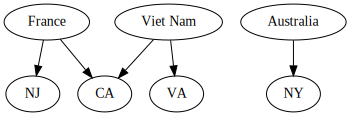

In [16]:
#Q13
g = Digraph(strict = True)
countries = ["Australia", "France", "Viet Nam"]
with zipfile.ZipFile("docs.zip") as zf:
    for x in range(len(df["ip"])):
        if edgar_utils.lookup_region(df["ip"][x]) in countries:
            url = str(int(df["cik"][x])) + "/" + df["accession"][x] + "/" + df["extention"][x]
            if url in zf.namelist():
                with zf.open(url) as f:
                    html = f.read().decode("utf-8")
                    
                file = edgar_utils.Filing(html)
                state = file.state()
                if state != None:
                    g.edge(edgar_utils.lookup_region(df["ip"][x]), state)
                    
g

In [17]:
#Q14
d = {}
with zipfile.ZipFile("docs.zip") as zf:
    for x in range(len(df["ip"])):
        url = str(int(df["cik"][x])) + "/" + df["accession"][x] + "/" + df["extention"][x]
        if url in zf.namelist():
            with zf.open(url) as f:
                html = f.read().decode("utf-8")
                
            file = edgar_utils.Filing(html)
            for i in file.addresses:
                if i in d:
                    d[i] += 1
                else:
                    d[i] = 1
                    
d = dict((k, v) for k, v in d.items() if v >= 225)
d

{'801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102': 720,
 '801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102\n817-334-4100': 464,
 '1114 AVENUE OF THE AMERICAS\n29TH FLOOR\nNEW YORK NY 10036': 356,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104': 305,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104\n3125066500': 264,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020': 225,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020\n212-956-2221': 225,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3': 225,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3\n604-683-6332': 225,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383': 289,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383\n425-442-0931': 289,
 '1881 GROVE AVENUE\nRADFORD VA 24141': 277}

<AxesSubplot:>

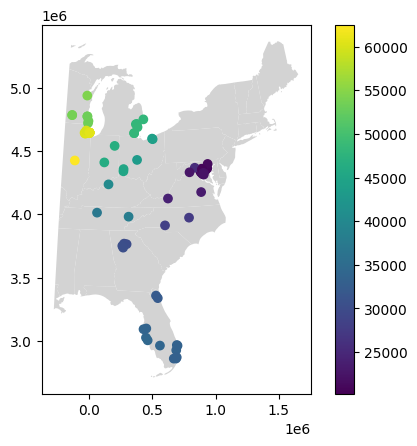

In [18]:
#Q15
df_locations = gpd.read_file("locations.geojson")
b = box(-90, 20, -55, 50)
new_loc = df_locations.intersection(b)
df_locations = df_locations[~new_loc.is_empty].to_crs("epsg:2022")

zips = []
for x in df_locations["address"]:
    z = re.findall(r"[A-Z]{2} (\d{5})", x)
    if len(z) > 0:
        if re.findall(r"^0", z[0]):
            z = int(z[0][1:])
        else:
            z = int(z[0])
    else:
        z = 0
    if z < 20000 or z > 70000:
        z = 0
        
    zips.append(z)
        
df_locations["zips"] = zips
df_locations = df_locations[df_locations["zips"] != 0]

usa = gpd.read_file("shapes/cb_2018_us_state_20m.shp").intersection(b).to_crs("epsg:2022")
ax = usa.plot(color = "lightgray")
df_locations.plot(column = "zips", legend = True, cmap = "viridis", ax = ax)